In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


,Audio,Transcript,Gender,Age,Accent,Mood,Environment,Duration
0,/content/drive/My Drive/speech_finalproject/data_processing/النجمة ياسمين رئيس في ضيافة ＂صاحبة السعادة＂_chunk_17_vocal_without_silence/1.wav,يمكن بعد فتاه المصنع بعد الفيلم ده الفيلم ده هو اللي خلاني اخذت,female,55.0,ar-EG,casual,clean,9.230000
1,/content/drive/My Drive/speech_finalproject/data_processing/النجمة ياسمين رئيس في ضيافة ＂صاحبة السعادة＂_chunk_17_vocal_without_silence/2.wav,ثقه في نفسي ويمكن الثقه دي هي اللي خلتني ما انا بقول لك سبحان الله هي الحاجات مترتبه الثقه اللي انا اخذتها,female,55.0,ar-EG,casual,clean,9.544989
2,/content/drive/My Drive/speech_finalproject/data_processing/النجمة ياسمين رئيس في ضيافة ＂صاحبة السعادة＂_chunk_17_vocal_without_silence/3.wav,بعد نجاح فيلم فتاه المصنع ونجاحي انا كممثله والدعم اللي شفته من السينمائيين,female,55.0,ar-EG,casual,clean,9.230000
3,/content/drive/My Drive/speech_finalproject/data_processing/النجمة ياسمين رئيس في ضيافة ＂صاحبة السعادة＂_chunk_17_vocal_without_silence/4.wav,ممثلين الناس كلها بتقول انت عامله دور حلو انت انت انت خمس جواز الحمد لله على طول,female,55.0,ar-EG,casual,clean,9.410998
4,/content/drive/My Drive/speech_finalproject/data_processing/النجمة ياسمين رئيس في ضيافة ＂صاحبة السعادة＂_chunk_17_vocal_without_silence/5.wav,NaN,female,55.0,ar-EG,casual,clean,10.000000
5,/content/drive/My Drive/speech_finalproject/data_processing/النجمة ياسمين رئيس في ضيافة ＂صاحبة السعادة＂_chunk_17_vocal_without_silence/6.wav,NaN,female,55.0,ar-EG,casual,clean,10.000000
6,/content/drive/My Drive/speech_finalproject/data_processing/النجمة ياسمين رئيس في ضيافة ＂صاحبة السعادة＂_chunk_17_vocal_without_silence/7.wav,NaN,female,55.0,ar-EG,casual,clean,10.000000
7,/content/drive/My Drive/speech_finalproject/data_processing/النجمة ياسمين رئيس في ضيافة ＂صاحبة السعادة＂_chunk_17_vocal_without_silence/8.wav,لارج واحد صحيح والمصلحه والمصلحه وطرف ثالث انما انت حسيتي,female,55.0,ar-EG,casual,clean,9.000000
8,/content/drive/My Drive/speech_finalproject/data_processing/النجمة ياسمين رئيس في ضيافة ＂صاحبة السعادة＂_chunk_17_vocal_without_silence/9.wav,يعني انت بتتكلمي بتعملي فيلم مع,female,55.0,ar-EG,casual,clean,8.332993
9,/content/drive/My Drive/speech_finalproject/data_processing/النجمة ياسمين رئيس في ضيافة ＂صاحبة السعادة＂_chunk_17_vocal_without_silence/10.wav,مخرج مهم جدا و فيلم بطوله وكمان اخذت الجوائز دي فلا خلاص انا بقى عندي كده عارفه لما,female,55.0,ar-EG,casual,clean,9.443991


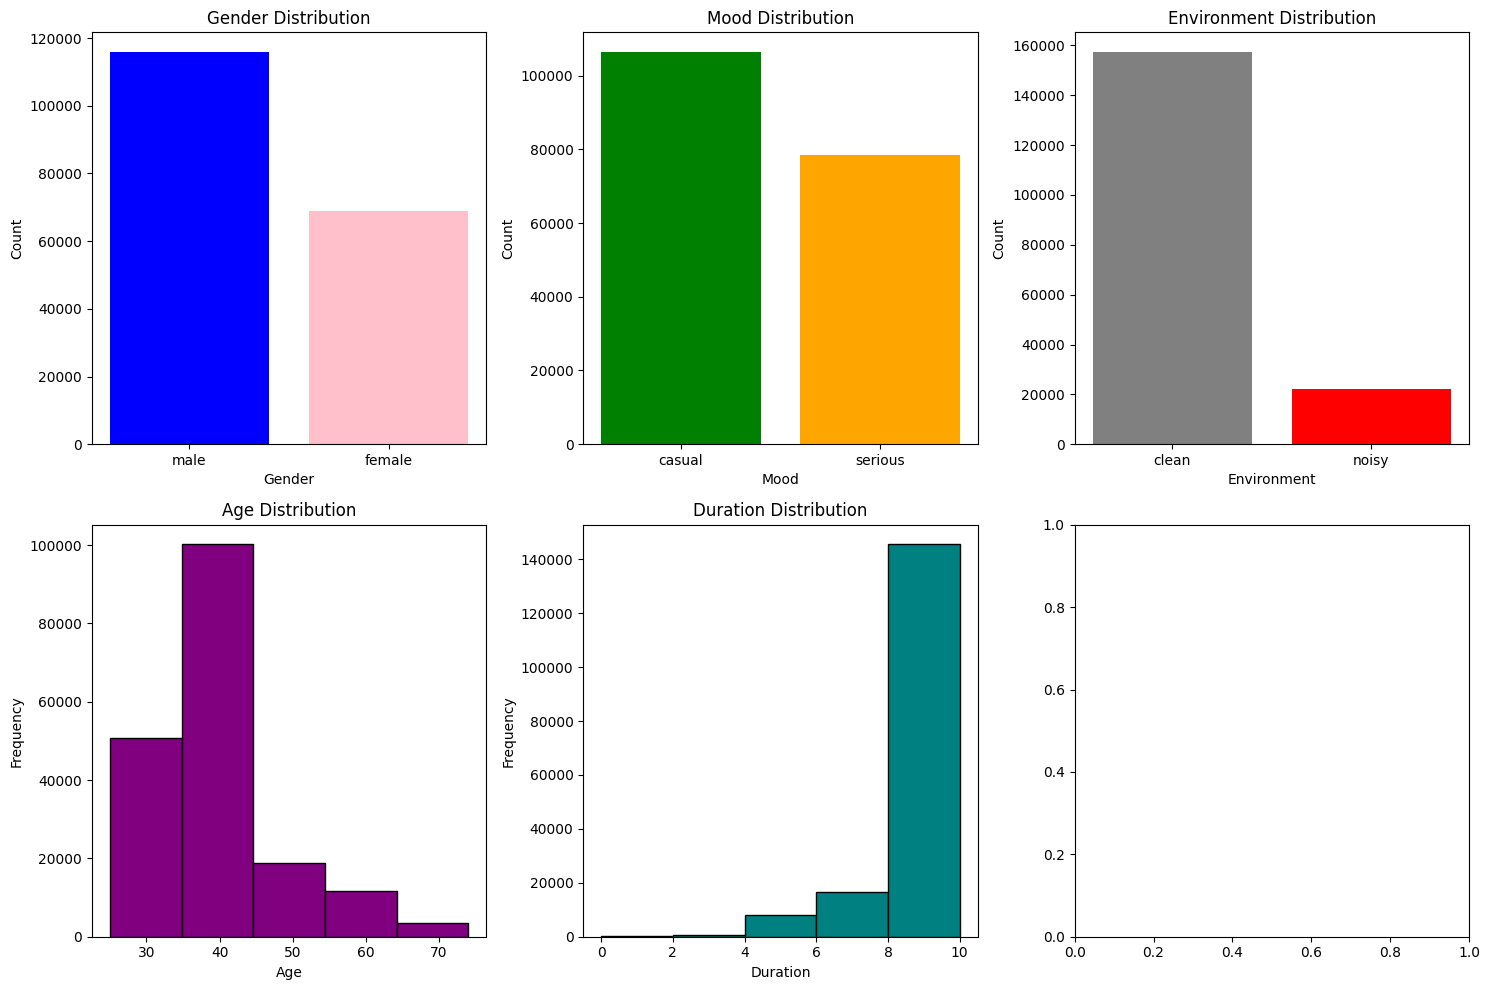

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import display, HTML

metadata_path = '/content/drive/My Drive/metadata.csv'

# Load the CSV file
df = pd.read_csv(metadata_path)

# Inspect the data
display(HTML(df.head(10).to_html()))

# Set up the plot layout (2x3 grid for 6 plots)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Gender distribution
axs[0, 0].bar(df['Gender'].value_counts().index, df['Gender'].value_counts().values, color=['blue', 'pink'])
axs[0, 0].set_title('Gender Distribution')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Count')

# Mood distribution
axs[0, 1].bar(df['Mood'].value_counts().index, df['Mood'].value_counts().values, color=['green', 'orange'])
axs[0, 1].set_title('Mood Distribution')
axs[0, 1].set_xlabel('Mood')
axs[0, 1].set_ylabel('Count')

# Environment distribution
axs[0, 2].bar(df['Environment'].value_counts().index, df['Environment'].value_counts().values, color=['gray', 'red'])
axs[0, 2].set_title('Environment Distribution')
axs[0, 2].set_xlabel('Environment')
axs[0, 2].set_ylabel('Count')

# Age distribution
axs[1, 0].hist(df['Age'], bins=5, color='purple', edgecolor='black')
axs[1, 0].set_title('Age Distribution')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Frequency')

# Duration distribution (new plot)
axs[1, 1].hist(df['Duration'], bins=5, color='teal', edgecolor='black')
axs[1, 1].set_title('Duration Distribution')
axs[1, 1].set_xlabel('Duration')
axs[1, 1].set_ylabel('Frequency')

# # NaN vs Non-NaN count for 'Transcript'
# nan_counts = df['Transcript'].isna().value_counts()
# axs[1, 2].bar(nan_counts.index.map({True: 'NaN', False: 'Not NaN'}), nan_counts.values, color=['red', 'green'])
# axs[1, 2].set_title('NaN vs Not NaN in Transcript')
# axs[1, 2].set_xlabel('Transcript Status')
# axs[1, 2].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [19]:
from datetime import timedelta

total_duration = df["Duration"].sum()
formatted_total_duration = str(timedelta(seconds=int(total_duration)))

empty_transcript_duration = df.loc[((df['Transcript'].isna()) | (df['Transcript'] == '')), 'Duration'].sum()

net_duration = total_duration - empty_transcript_duration
formatted_net_duration = str(timedelta(seconds=int(net_duration)))

empty_transcript_count = df.loc[((df['Transcript'].isna()) | (df['Transcript'] == ''))].shape[0]
transcript_count = len(df)

print(f"Total Duration: {formatted_total_duration}")  # 66:05:49
print(f"Net Duration: {formatted_net_duration}") # 42:39:46
print(f"Percentage of Empty Transcripts Duration: {(empty_transcript_duration/total_duration)*100:.2f}%")
print(f"Total Transcripts: {transcript_count}")
print(f"Empty Transcripts: {empty_transcript_count}")
print(f"Percentage of Empty Transcripts Count: {(empty_transcript_count/transcript_count)*100:.2f}%")

Total Duration: 18 days, 1:13:03
Net Duration: 9 days, 23:48:30
Percentage of Empty Transcripts Duration: 44.64%
Total Transcripts: 187091
Empty Transcripts: 77519
Percentage of Empty Transcripts Count: 41.43%
